In [31]:
import pandas as pd
import seaborn as sns

rental19 = pd.read_csv('data/#5. 공공자전거_이용정보(시간대별)/new_ride_data_2019.csv', encoding='cp949')

In [32]:
rental19 = rental19.rename({'Unnamed: 0': 'time'}, axis=1)
rental19.head()

rental19.age = rental19.age.map({'10대': '10s', '20대': '20s', '30대': '30s', '40대': '40s',
                                 '50대': '50s', '60대': '60s','70대': '70s'}) 

In [33]:
rental19.usage.eq(1).mean()

0.8216951423193863

In [34]:
# 중간보고 EDA에서는 aggregation 된 데이터 제외하고 usage==1인 행만 살펴봄
rental19 = rental19[rental19.usage==1]

In [35]:
rental19.time = pd.to_datetime(rental19.time)
rental19['hour'] = rental19.time.map(lambda x: x.hour)
rental19['date'] = rental19.time.map(lambda x: x.date())
rental19.head(2)

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date
0,2019-01-01,정기권,F,10s,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01
1,2019-01-01,정기권,F,20s,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01


In [36]:
sample = rental19.iloc[:50000]
sample = sample.copy()

In [37]:
sample.head(5)

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date
0,2019-01-01,정기권,F,10s,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01
1,2019-01-01,정기권,F,20s,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01
2,2019-01-01,정기권,F,20s,1,20.18,0.23,980.0,5,1362_보문역6번출구 앞,0,2019-01-01
3,2019-01-01,정기권,F,20s,1,7.48,0.10,420.0,4,3106_홍남교 두바퀴쉼터,0,2019-01-01
4,2019-01-01,정기권,F,20s,1,25.70,0.26,1100.0,7,118_광흥창역 2번출구 앞,0,2019-01-01


In [38]:
def ordering_hour(df):
    df.hour = \
    pd.Categorical(df.hour,
                  categories=list(range(4,24)) + [0,1,2,3],
                  ordered=True)
    return df

In [39]:
sample = ordering_hour(sample)

In [40]:
sample.head(3)

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date
0,2019-01-01,정기권,F,10s,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01
1,2019-01-01,정기권,F,20s,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01
2,2019-01-01,정기권,F,20s,1,20.18,0.23,980.0,5,1362_보문역6번출구 앞,0,2019-01-01


In [41]:
rental19 = ordering_hour(rental19)

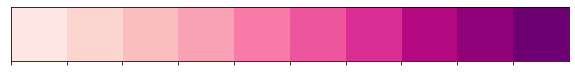

In [42]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

In [58]:
rental19['age_cat'] = rental19.age.map({'10s': '10s', '20s': '20s', '30s': '30~40s', '40s': '30~40s',
                                        '50s': '50s', '60s': '60~70s','70s': '60~70s'})

<AxesSubplot:xlabel='hour', ylabel='count'>

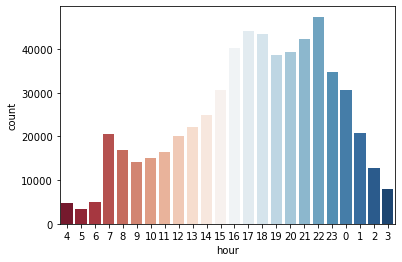

In [44]:
sns.countplot(x='hour', data=rental19[rental19.age == '10s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

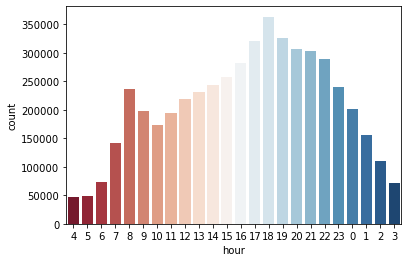

In [45]:
sns.countplot(x='hour', data=rental19[rental19.age == '20s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

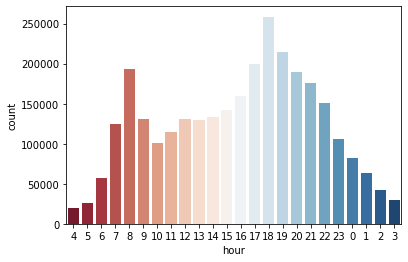

In [46]:
sns.countplot(x='hour', data=rental19[rental19.age == '30s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

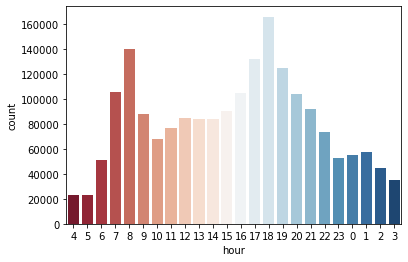

In [47]:
sns.countplot(x='hour', data=rental19[rental19.age == '40s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

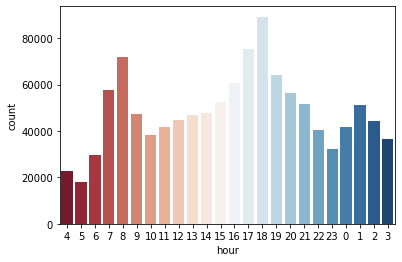

In [48]:
sns.countplot(x='hour', data=rental19[rental19.age == '50s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

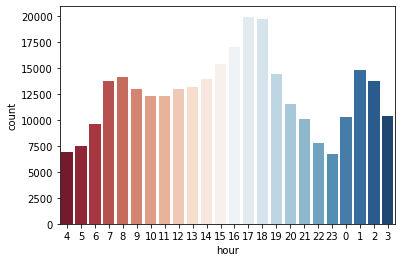

In [49]:
sns.countplot(x='hour', data=rental19[rental19.age == '60s'], palette='RdBu')

<AxesSubplot:xlabel='hour', ylabel='count'>

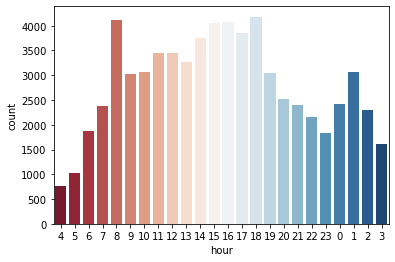

In [50]:
sns.countplot(x='hour', data=rental19[rental19.age == '70s'], palette='RdBu')

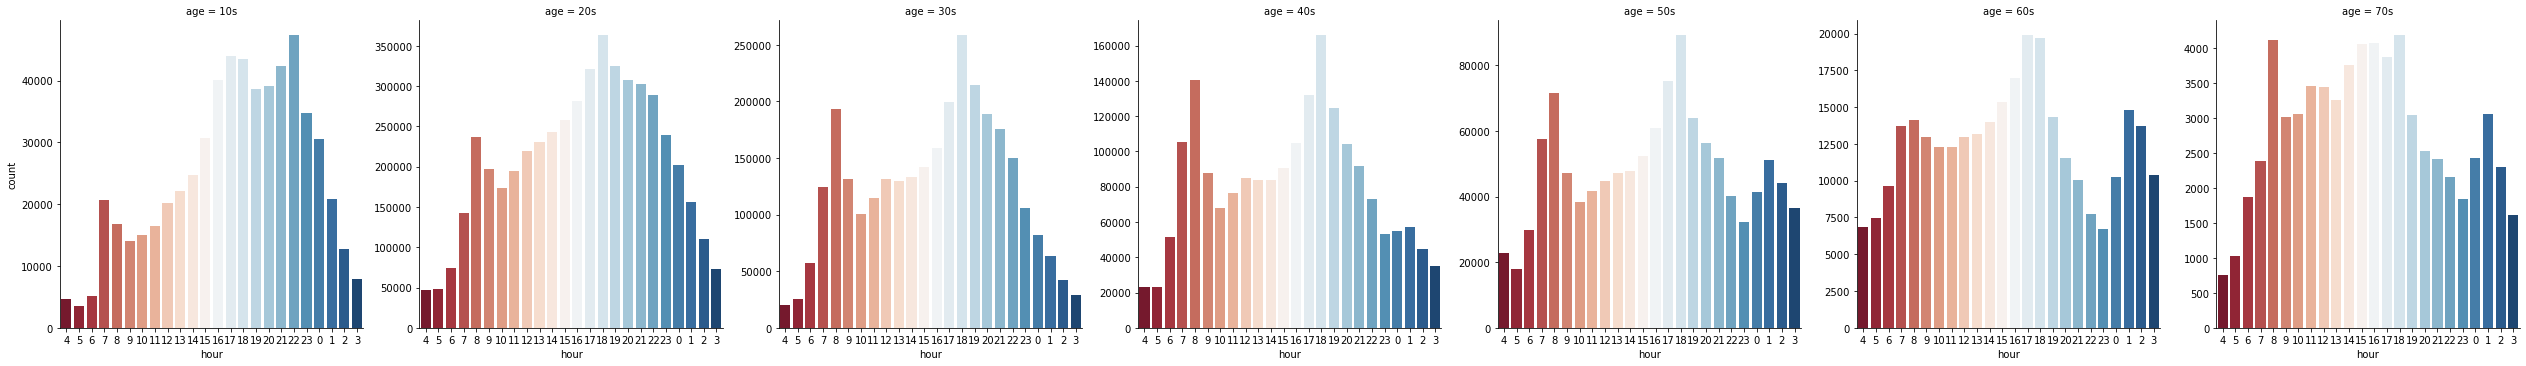

In [51]:
sns.catplot(x='hour', col='age', data=rental19, kind='count', sharey=False, palette='RdBu')

In [57]:
rental19.head()

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date,age_cat
0,2019-01-01,정기권,F,10s,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01,NaN
1,2019-01-01,정기권,F,20s,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01,NaN
2,2019-01-01,정기권,F,20s,1,20.18,0.23,980.0,5,1362_보문역6번출구 앞,0,2019-01-01,NaN
3,2019-01-01,정기권,F,20s,1,7.48,0.10,420.0,4,3106_홍남교 두바퀴쉼터,0,2019-01-01,NaN
4,2019-01-01,정기권,F,20s,1,25.70,0.26,1100.0,7,118_광흥창역 2번출구 앞,0,2019-01-01,NaN


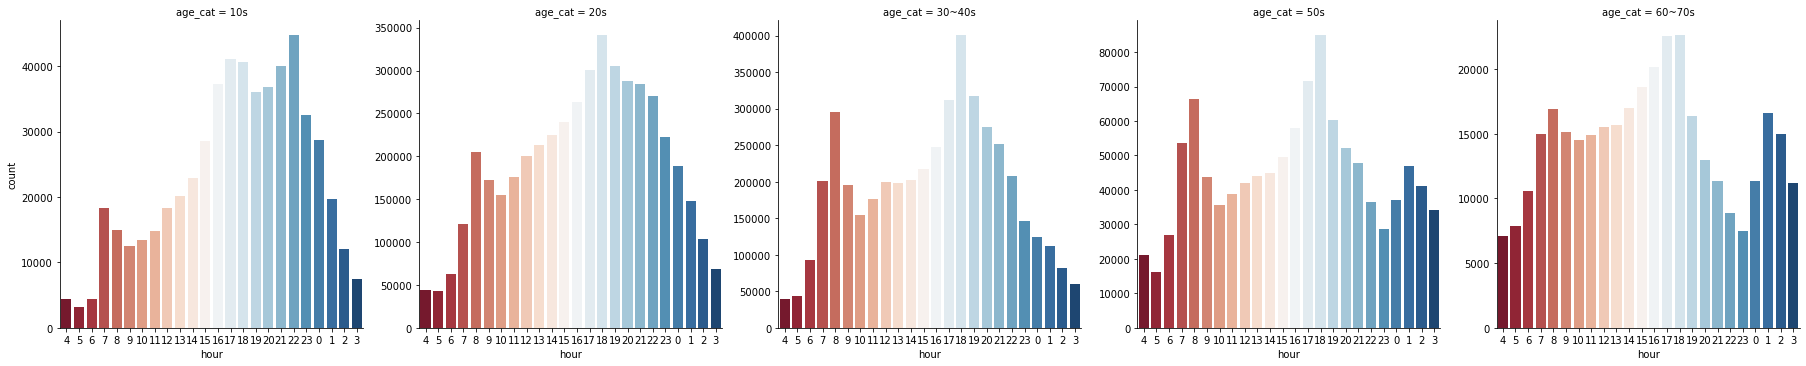

In [69]:
sns.catplot(x='hour', col='age_cat', data=rental19[rental19.usage_time.lt(120) & rental19.usage_time.gt(3)], kind='count', sharey=False, palette='RdBu')

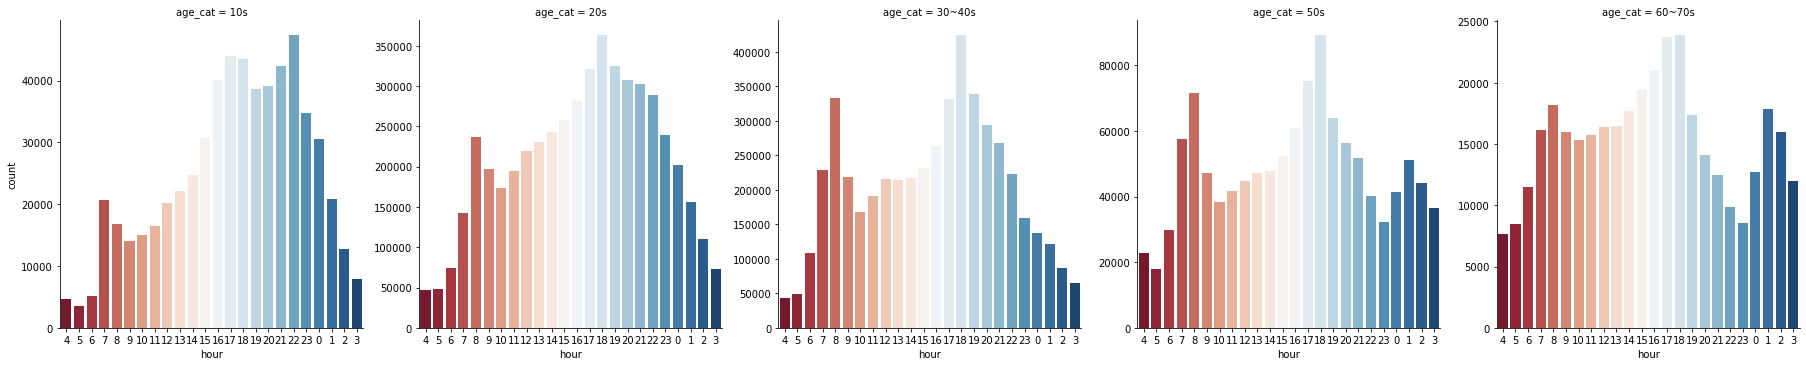

In [60]:
catplot = sns.catplot(x='hour', col='age_cat', data=rental19, kind='count', sharey=False, palette='RdBu')
catplot.savefig('age_hour.png')

<AxesSubplot:xlabel='age', ylabel='count'>

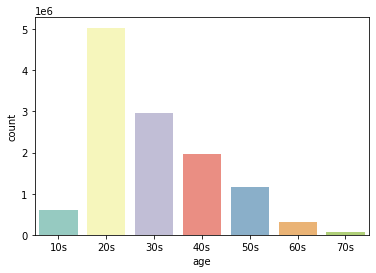

In [52]:
sns.countplot(x='age', data=rental19, palette='Set3')

In [54]:
rental19.age.value_counts().sum()

12095258

<AxesSubplot:ylabel='age'>

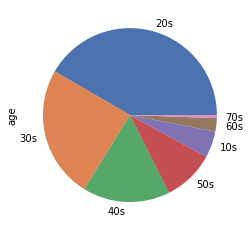

In [53]:
rental19.age.value_counts().plot.pie()

<AxesSubplot:xlabel='hour', ylabel='count'>

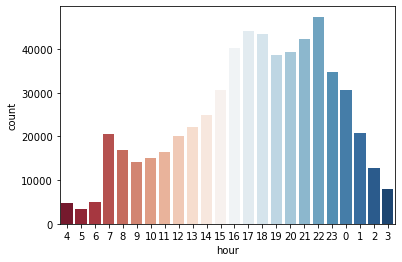

In [24]:
sns.countplot(x='hour', data=rental19[rental19.age == '10대'], palette='RdBu')

In [62]:
rental19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12095258 entries, 0 to 14719878
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   time         datetime64[ns]
 1   rental_code  object        
 2   sex          object        
 3   age          object        
 4   usage        int64         
 5   calories     float64       
 6   carbon       float64       
 7   distance     float64       
 8   usage_time   int64         
 9   location     object        
 10  hour         category      
 11  date         object        
 12  age_cat      object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.2+ GB


In [64]:
rental19.usage_time.value_counts()

6        589692
5        585114
7        564222
4        549436
8        533701
          ...  
664           1
668           1
670           1
671           1
22183         1
Name: usage_time, Length: 763, dtype: int64

In [ ]:
sns.displot(x='usage_time', col)

C:\Users\jomin\anaconda3\lib\site-packages\seaborn\categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


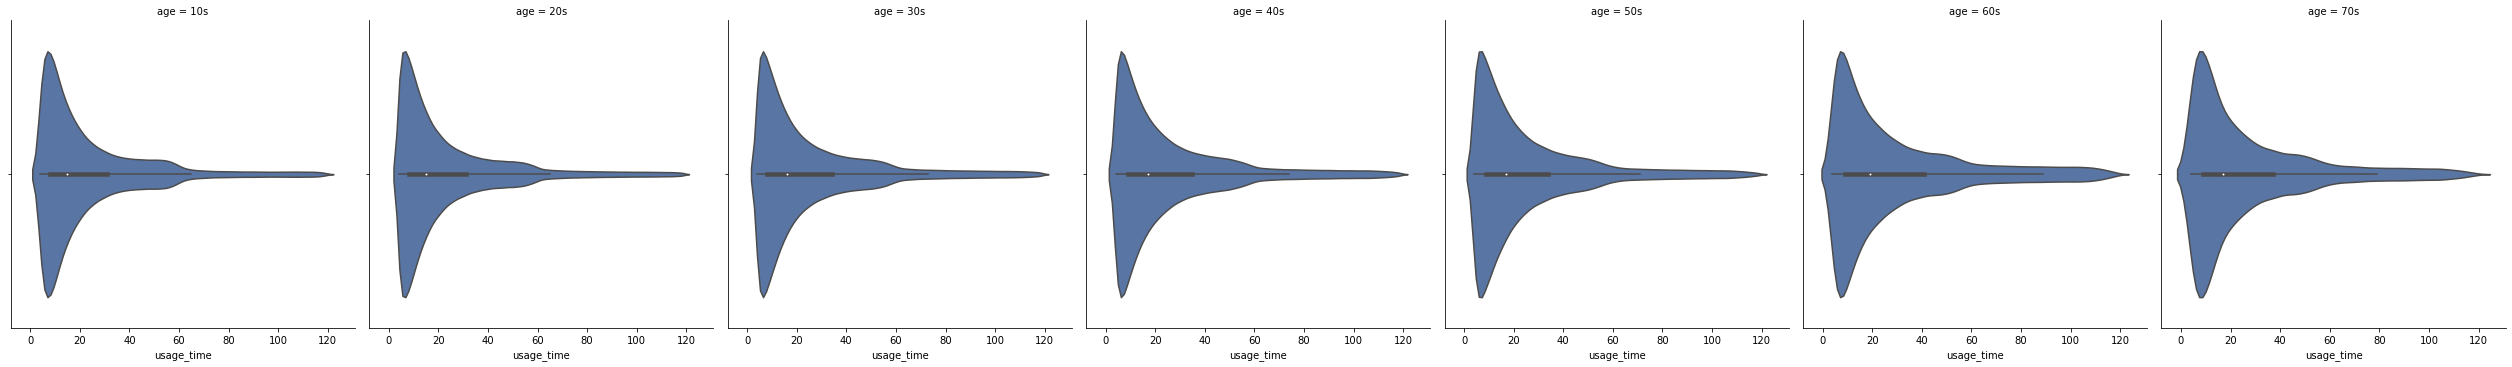

In [66]:
sns.catplot(x='usage_time', col='age', data=rental19[rental19.usage_time.lt(120) & rental19.usage_time.gt(3)], kind='violin', sharey=False)

C:\Users\jomin\anaconda3\lib\site-packages\seaborn\categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


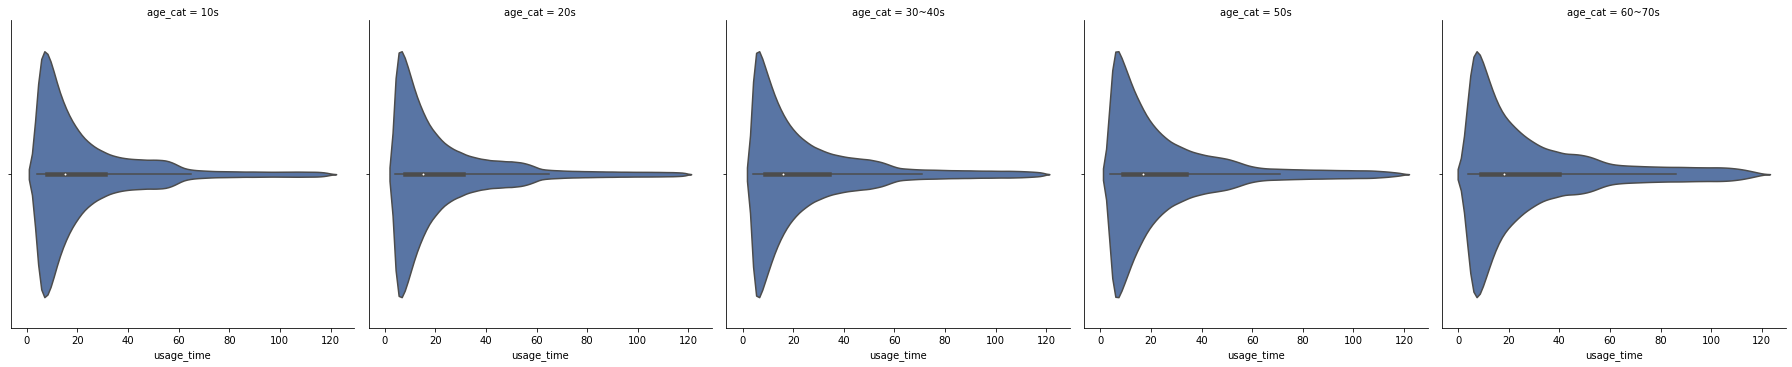

In [68]:
sns.catplot(x='usage_time', col='age_cat', data=rental19[rental19.usage_time.lt(120) & rental19.usage_time.gt(3)], kind='violin', sharey=False)